# 금융 데이터 수집 예제

[colaboratory로 실행](https://colab.research.google.com/drive/1w2iaKw-0pLXUUhfNRTF_lWdtYVX_o2OI?usp=sharing) 

- 경제 데이터 이외에 개별 종목에 대한 금융 데이터를 전문적인 분,초 당 거래데이터는 아니더라도 일반적인 금융 데이터를 수집해서 분석하는 데 사용할 수 있는 예제를 정리 하고자 한다.

- 사용 라이브러리 :
  + [pykrx](https://github.com/sharebook-kr/pykrx) : 국내 지수 데이터
  + [FinanceDataReader](https://github.com/FinanceData/FinanceDataReader) : 국내 주가 데이터
  + [marcap](https://github.com/FinanceData/marcap): 국내 시가 총액 데이터셋

reference : https://wikidocs.net/228020



In [1]:
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 2.1 MB/s eta 0:00:00


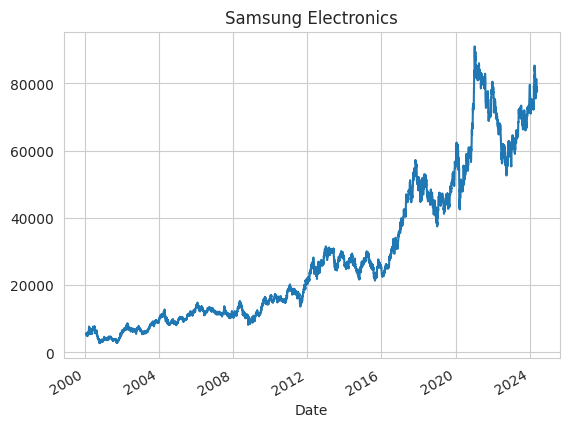

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

ss = fdr.DataReader('005930')
ss.Close.plot(label = 'daily')
plt.title('Samsung Electronics')
plt.show()

In [1]:
!pip install pykrx

#### 라이브러리 불러오기

In [2]:
import os
import time
from datetime import datetime

import pandas as pd
from pykrx import stock
from pykrx import bond
from time import sleep


#### KRX 종목 리스트

In [3]:
now = datetime.now()
today_date1 = now.strftime('%Y%m%d')
start_date = '20240522'

In [4]:
market_list = ['KOSPI', 'KOSDAQ', 'KONEX']

kor_ticker_list_df = pd.DataFrame()
for market_nm in market_list:
    ticker_list = stock.get_market_ticker_list(today_date1, market=market_nm)
    for tickers in ticker_list:
        corp_name = stock.get_market_ticker_name(tickers)
        df = pd.DataFrame({'ticker':tickers,
                           'corp_name':corp_name,
                           'marke': market_nm
                          }, index = [0])
        kor_ticker_list_df = pd.concat([kor_ticker_list_df,df])
kor_ticker_list_df = kor_ticker_list_df.reset_index(drop = True)
kor_ticker_list_df.head()

,ticker,corp_name,marke
0,095570,AJ네트웍스,KOSPI
1,006840,AK홀딩스,KOSPI
2,027410,BGF,KOSPI
3,282330,BGF리테일,KOSPI
4,138930,BNK금융지주,KOSPI


In [5]:
kor_ticker_list = kor_ticker_list_df['ticker']
kor_ticker_list_df.to_csv(f'kor_ticker_list.csv', index=False, mode='w')

#### 종목별 주가 정보

In [ ]:
for ticker_nm in kor_ticker_list:
    file_name = 'kor_stock_ohlcv'

    try:
        df_raw = stock.get_market_ohlcv(start_date, today_date1, ticker_nm)
        df_raw = df_raw.reset_index()
        df_raw['ticker'] = ticker_nm


        if not os.path.exists(f'{file_name}.csv'):
            df_raw.to_csv(f'{file_name}.csv', index=False, mode='w')
        else:
            df_raw.to_csv(f'{file_name}.csv', index=False, mode='a', header=False)

        print(f'{ticker_nm} success')
    except:
        print(f'{ticker_nm} fail')

095570 success
006840 success
027410 success
282330 success
138930 success
001460 success
001465 success
001040 success
079160 success
00104K success
000120 success
011150 success
011155 success
001045 success
097950 success
097955 success
000480 success
000590 success
012030 success
016610 success
005830 success
000990 success
139130 success
001530 success
000210 success
000215 success
375500 success
37550L success
37550K success
007340 success
004840 success
155660 success
069730 success
017860 success
017940 success
365550 success
383220 success
007700 success
114090 success
078930 success
006360 success
001250 success
007070 success
078935 success
012630 success
039570 success
089470 success
294870 success
009540 success
267250 success
267270 success
443060 success
010620 success
322000 success
042670 success
267260 success
329180 success
097230 success
014790 success
003580 success
204320 success
060980 success
011200 success
035000 success
003560 success
175330 success
234080 suc

#### 종목별 시가총액

In [ ]:
for ticker_nm in kor_ticker_list:
    file_name = 'kor_market_cap'

    try:
        df_raw = stock.get_market_cap(start_date, today_date1, ticker_nm)
        df_raw = df_raw.reset_index()
        df_raw['ticker'] = ticker_nm
        df_raw = df_raw.drop(['종가','거래량', '거래대금'], axis = 1)



        if not os.path.exists(f'data_crawler/{file_name}.csv'):
            df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='w')
        else:
            df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='a', header=False)

        print(f'{ticker_nm} success')
    except:
        print(f'{ticker_nm} fail')

#### DIV/BPS/PER/EPS 정보 수집

In [ ]:
for ticker_nm in kor_ticker_list:
    file_name = 'kor_stock_fundamental'

    try:
        # market ="ALL"
        df_raw = stock.get_market_fundamental(start_date, today_date1, ticker_nm)
        df_raw = df_raw.reset_index()
        df_raw['ticker'] = ticker_nm


        if not os.path.exists(f'data_crawler/{file_name}.csv'):
            df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='w')
        else:
            df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='a', header=False)

        print(f'{ticker_nm} success')
    except:
        print(f'{ticker_nm} fail')

In [ ]:
df = stock.get_market_fundamental('20240119', market = 'ALL')
df.index.name = 'Code'
display(df.head(10))

In [ ]:
for ticker in stock.get_index_ticker_list(market = 'KRX'):
  print(ticker, stock.get_index_ticker_name(ticker))

In [ ]:
code_l = stock.get_index_portfolio_deposit_file("5300")
display(len(code_l))

In [ ]:
def get_index_listing(index_name, market = None):
  if market is None:
    for _market in ['KOSPI', 'KOSDAQ', 'KRX']:
      res = get_index_listing(index_name, _market)
      if res is not None:
        return res
    return None

  for ticker in stock.get_index_ticker_list(market = market):
    name = stock.get_index_ticker_name(ticker)
    if name == index_name:
      return stock.get_index_portfolio_deposit_file(ticker)
  return None


display(len(get_index_listing('코스피 200')))
display(len(get_index_listing('KRX 300')))

##### 일자별 거래실적 추이(거래대금)

In [ ]:
buy_sell_type_list = ['순매수', '매수', '매도']
for buy_sell_type in buy_sell_type_list:
    for ticker_nm in kor_ticker_list:
        file_name = 'kor_stock_trading_value_by_investor'
        try:
            df_raw = stock.get_market_trading_value_by_date(start_date, today_date1,
                                                                             ticker_nm,
                                                                             detail=True,
                                                                             on = buy_sell_type)
            df_raw = df_raw.reset_index()
            df_raw['ticker'] = ticker_nm
            df_raw['type'] = buy_sell_type


            if not os.path.exists(f'data_crawler/{file_name}.csv'):
                df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='w')
            else:
                df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='a', header=False)

            print(f'{ticker_nm} success')
        except:
            print(f'{ticker_nm} fail')
    time.sleep(300)

#### 일자별 거래실적 추이 (거래량)

In [ ]:
buy_sell_type_list = ['순매수', '매수', '매도']
for buy_sell_type in buy_sell_type_list:
    for ticker_nm in kor_ticker_list:
        file_name = 'kor_stock_trading_volume_by_date'
        try:
            df_raw = stock.get_market_trading_volume_by_date(start_date, today_date1,
                                                                             ticker_nm,
                                                                             detail=True,
                                                                             on = buy_sell_type)
            df_raw = df_raw.reset_index()
            df_raw['ticker'] = ticker_nm
            df_raw['type'] = buy_sell_type


            if not os.path.exists(f'data_crawler/{file_name}.csv'):
                df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='w')
            else:
                df_raw.to_csv(f'data_crawler/{file_name}.csv', index=False, mode='a', header=False)

            print(f'{ticker_nm} success')
        except:
            print(f'{ticker_nm} fail')
    time.sleep(300)